In [48]:
import pandas as pd 
import numpy as np 
import seaborn as sb 

from sklearn.preprocessing import StandardScaler  

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [2]:
print(np.random.random(3))

[0.1457955  0.39572517 0.91472273]


In [5]:
df = sb.load_dataset("iris") 
Ydf = df["species"]
Ydf = df["species"] 
Xdf = df.drop(["species"],axis=1)

In [6]:
ss = StandardScaler() 
Xdf = pd.DataFrame(ss.fit_transform(Xdf) , columns=Xdf.columns)
df = Xdf.copy() 
df["species"]=Ydf 

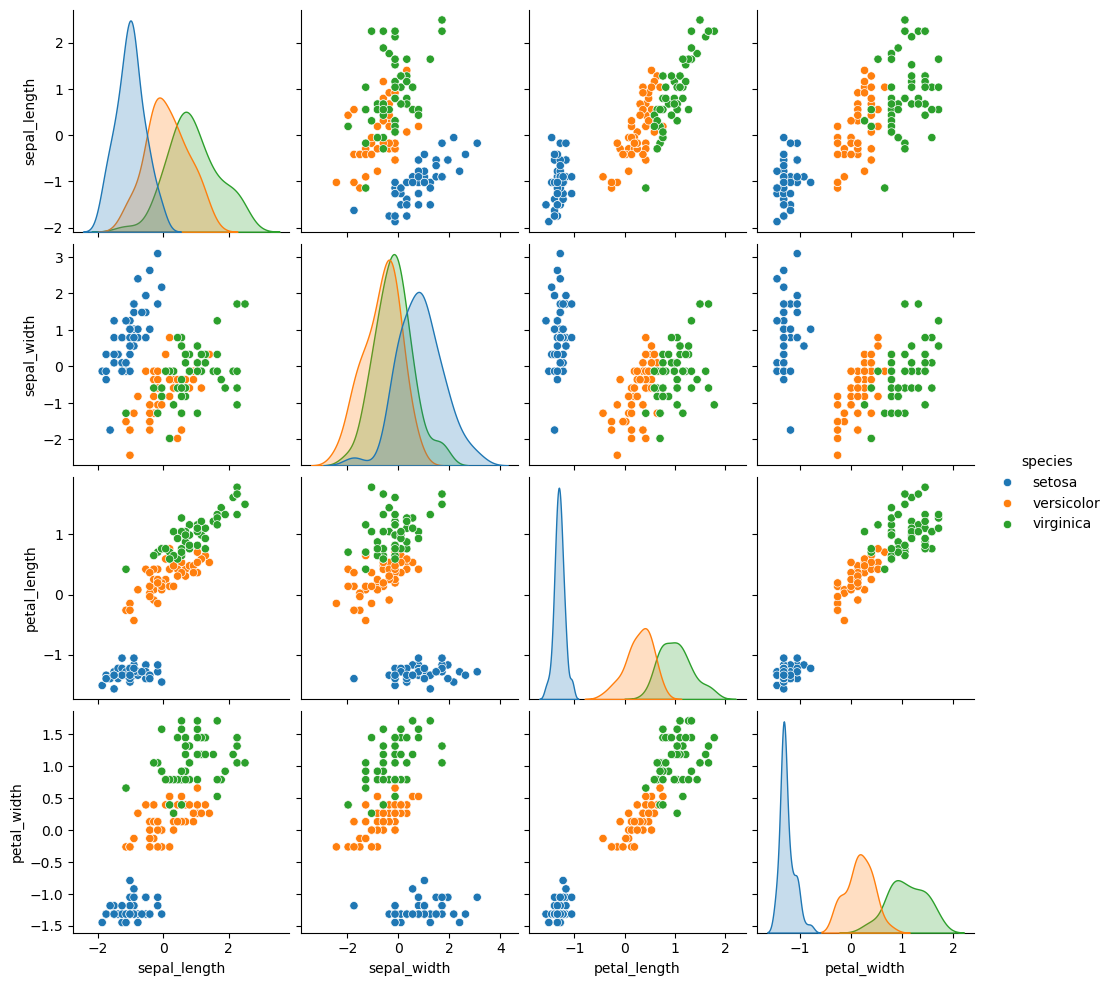

In [7]:
sb.pairplot(data=df, hue="species")

In [80]:
class K_means: 
    def __init__(self,k,iterationCount=100):
        self.k=k 
        self.iterationCount=iterationCount

    def distance(self,x,y,d): 
        result = 0 
        for i in range(d): 
            result+=((x[i]-y[i])**2)
        return result 
        
    def fit_transform(self,df): 
        df["label"]= 0 
        X = df.values 
        d = X.shape[1]-1 
        n = X.shape[0] 
        randValues = [0.63604923,0.10302251,0.6768399,0.53748269,0.57447605,0.76090097,0.17830741,0.91614122,0.03747982,0.81576184,0.08074871,0.67199989]
        randInd=0 
        means = [] 
        for i in range(self.k): 
            m = [] 
            for j in range(d): 
                h = np.max(X[:,j])
                rand = np.random.random(1)
                if(self.k==3):
                    rand = randValues[randInd]
                    randInd+=1 
                r = (rand*h - (h/2) )*2 
                m.append(r) 
            means.append(m) 
        # print("************") 
        # for m in means: 
        #     print(m)
        # print("************")
        for i in range(self.iterationCount): 
            for j in range(n) : 
                minDist = self.distance(X[j],means[0],d)
                optMeanI = 0 
                for z in range(self.k): 
                    dist = self.distance(X[j],means[z],d) 
                    if(dist<minDist) : 
                        minDistance = dist 
                        optMeanI = z 
                X[j,d] = optMeanI 
            for z in range(self.k): 
                subX = np.array([x for x in X if x[d]==z] )
                sum = np.zeros(d) 
                for x in subX: 
                    sum += x[0:d] 
                means[z] = sum/(subX.shape[0]+1)

        return means, X 
                
        
# kmeans = K_means(3) 
# print(kmeans.fit_transform(Xdf))

     sepal_length  sepal_width  petal_length  petal_width  species
0       -0.900681     1.019004     -1.340227    -1.315444      2.0
1       -1.143017    -0.131979     -1.340227    -1.315444      2.0
2       -1.385353     0.328414     -1.397064    -1.315444      2.0
3       -1.506521     0.098217     -1.283389    -1.315444      2.0
4       -1.021849     1.249201     -1.340227    -1.315444      2.0
..            ...          ...           ...          ...      ...
145      1.038005    -0.131979      0.819596     1.448832      1.0
146      0.553333    -1.282963      0.705921     0.922303      0.0
147      0.795669    -0.131979      0.819596     1.053935      1.0
148      0.432165     0.788808      0.933271     1.448832      1.0
149      0.068662    -0.131979      0.762758     0.790671      0.0

[150 rows x 5 columns]


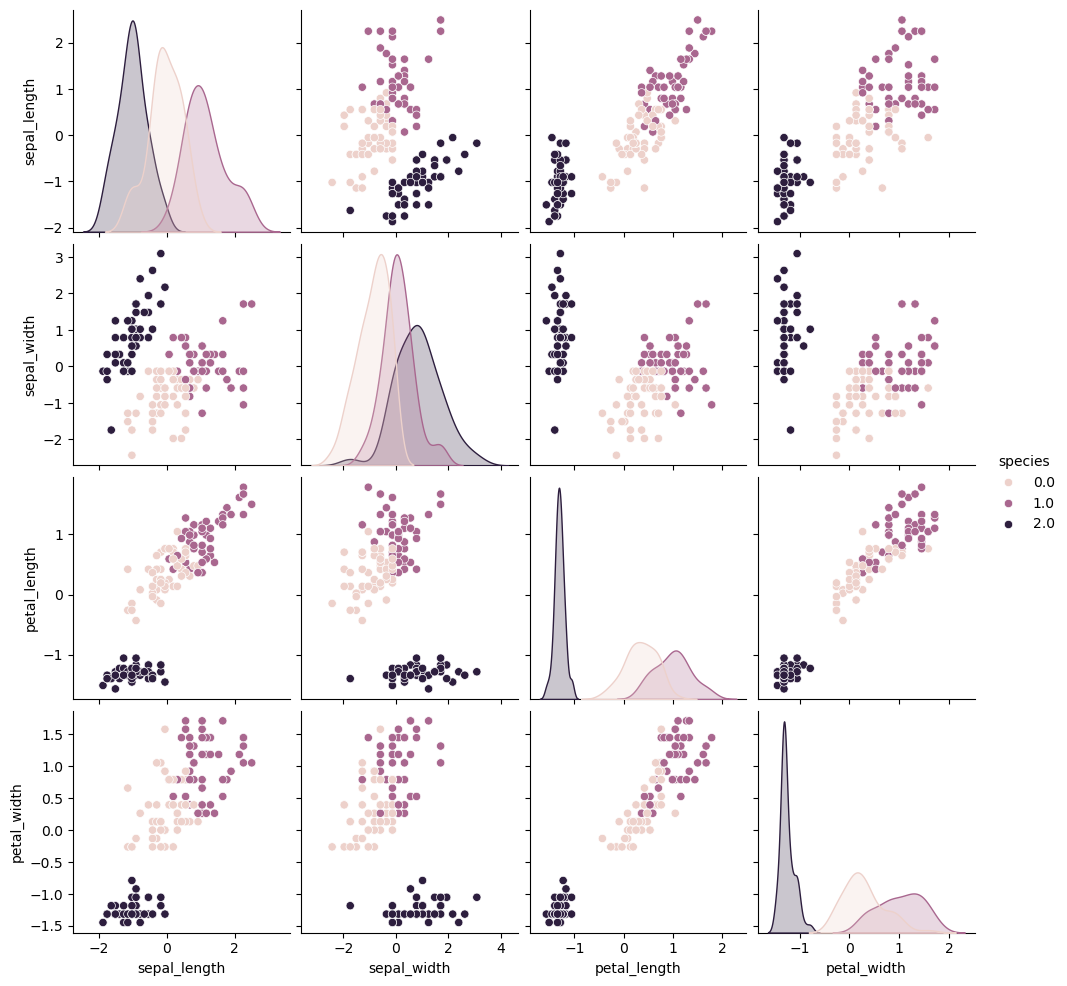

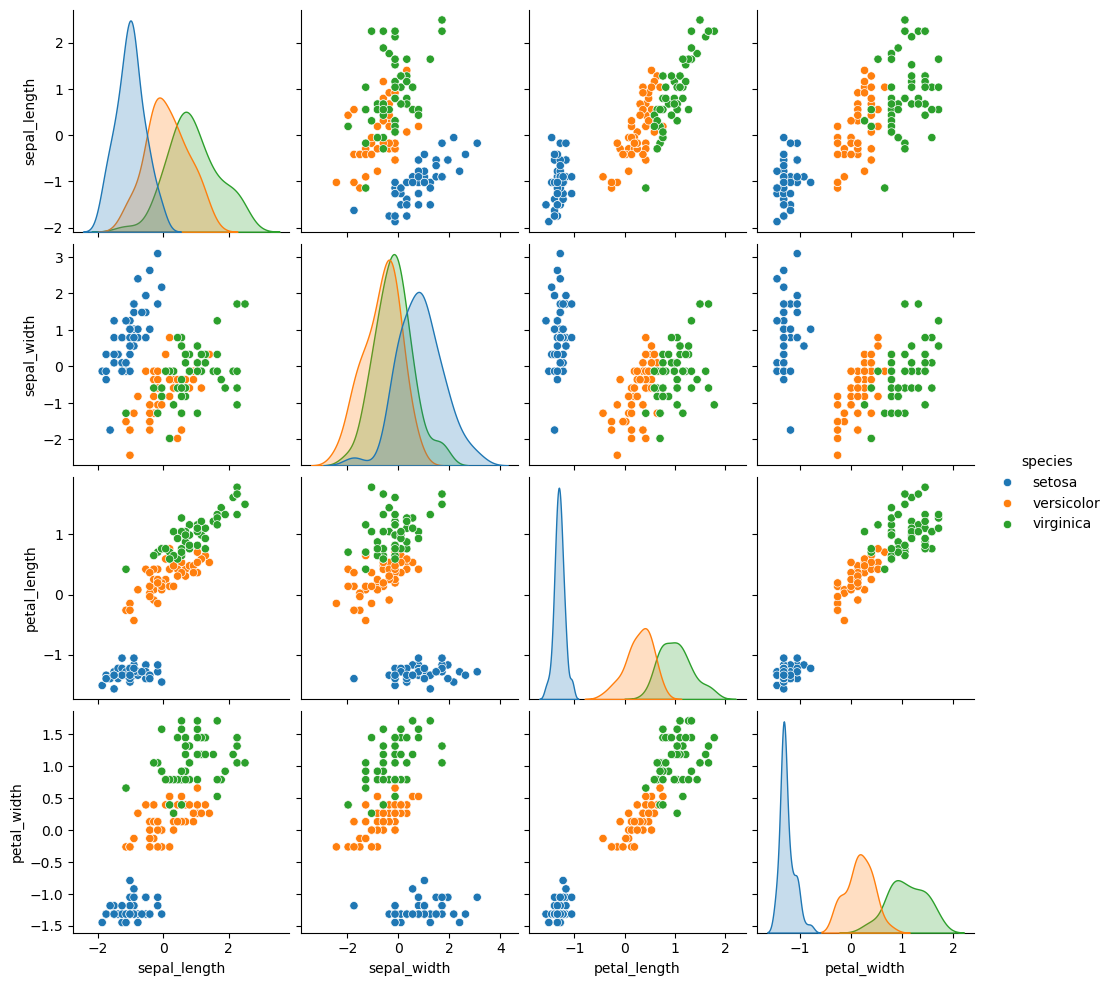

In [81]:
kmeans = K_means(3) 
centers,newX = kmeans.fit_transform(Xdf) 
predicted = pd.DataFrame(newX, columns=df.columns) 
print(predicted)
sb.pairplot(data = predicted, hue="species") 
sb.pairplot(data=df, hue="species")

<Axes: >

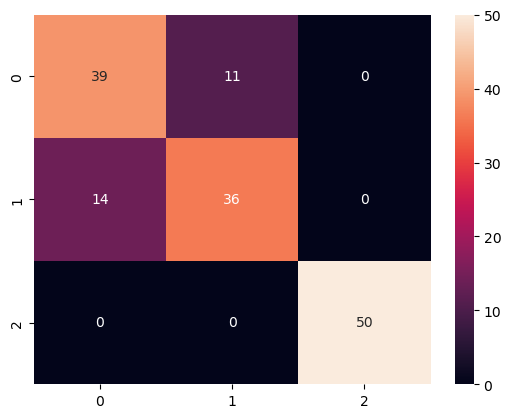

In [82]:
encoding = {"versicolor":0,"virginica":1,"setosa":2} 
Y_true = Ydf.values 
Y_true = [encoding[y] for y in Y_true] 
Y_predicted = predicted["species"].values 
cm = confusion_matrix(Y_true,Y_predicted) 
sb.heatmap(cm, annot=True) 

In [79]:
accuracy = accuracy_score(Y_true,Y_predicted)
precision = precision_score(Y_true,Y_predicted,average="macro")
recall = recall_score(Y_true,Y_predicted,average="macro")
f1 = f1_score(Y_true,Y_predicted,average="macro") 

print(f"""
accuracy:{accuracy}
precision:{precision} 
recall:{recall} 
f1:{f1}
""")


accuracy:0.8333333333333334
precision:0.833935501137428 
recall:0.8333333333333334 
f1:0.8331831982117239



In [37]:
def euclDistance(x,y,d): 
        result = 0 
        for i in range(d): 
            result+=((x[i]-y[i])**2)
        return np.sqrt(result) 

In [46]:
# print(centers) 
inertia = 0
for x in newX:
    inertia += euclDistance(x,centers[int(x[-1])],len(x)-1) 
print("Inertia:",inertia)

Inertia: 128.97156755175942


In [54]:
ARI = adjusted_rand_score(Y_true,Y_predicted) 
Silh_score = silhouette_score(Xdf, Y_predicted) 

print("ARI:", ARI) 
print("Silhouette score:", Silh_score)

ARI: 0.6100728505285608
Silhouette score: 0.45937792074496625


<Axes: >

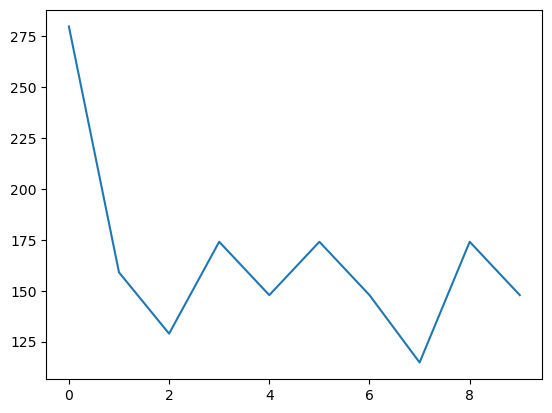

In [84]:
def findInertia(newX,centers): 
    inertia = 0
    for x in newX:
        inertia += euclDistance(x,centers[int(x[-1])],len(x)-1) 
    return inertia 

inertias = [] 
for k in range(1,11): 
    kmeans = K_means(k) 
    centers,newX = kmeans.fit_transform(Xdf) 
    inertias.append(findInertia(newX,centers)) 

sb.lineplot(inertias)

<Axes: >

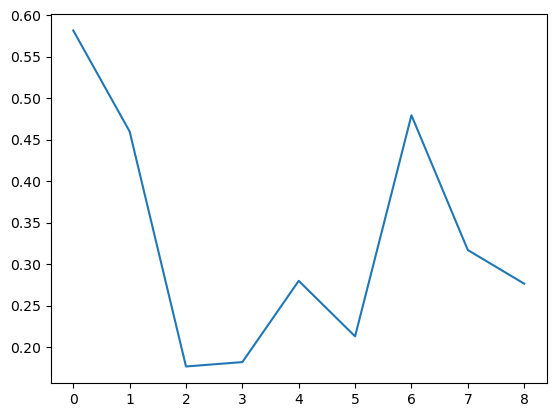

In [86]:
silhs = [] 
for k in range(2,11): 
    kmeans = K_means(k) 
    centers,newX = kmeans.fit_transform(Xdf) 
    predicted = pd.DataFrame(newX, columns=df.columns) 
    Y_predicted = predicted["species"].values 
    silhs.append(silhouette_score(Xdf, Y_predicted))

sb.lineplot(silhs)